In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercises 

We will work with the following two files (slight changes from the ones we saw on part I):

* `pedigree.txt`
* `pheno.txt`

### Exercise 1

For this exercise we will work with the `pedigree.txt` file.

* Change the type of the first column to string.
* Check whether missing data exist using two different approaches.
* Remove any row that has a missing value.
* Remove rows only if there are two or more missing values.
* Fill the missing values using the next valid observation.
* Fill the missing values using the previous valid observation.
* Check for the existence of duplicated values in the first column. In case there are duplicates estimate how many. Remove the duplicates.
* A colleague tells you that also the records with `0` denote missing data. Make the appropriate changes so that it is clear that those values denote also missing data.
* After removing all missing values and duplicates create a barplot depicting the number of offspring of each sire.
* Same as the previous but this time depicting the size of each family.
* Create a new column that for offspring originating from the first 20 sires has the value `early` and for the rest `late`. Check how many records are on each category.

Change the type of the first column to string.

In [2]:
til_ped = pd.read_csv("pedigree.txt", sep="\t")
til_ped

,Id,Sire,Dam,Line
0,10977965,1.0,1.0,Wami
1,10978207,1.0,1.0,Wami
2,10978378,1.0,1.0,Wami
3,10978407,1.0,1.0,Wami
4,10977732,1.0,1.0,Wami
...,...,...,...,...
1747,10978369,NaN,NaN,Ruaha
1748,10978013,35.0,NaN,Ruaha
1749,10978579,NaN,NaN,Ruaha
1750,10977708,NaN,35.0,Ruaha


In [3]:
til_ped.shape

(1752, 4)

In [4]:
til_ped[['Id']] = til_ped[['Id']].astype('str')

Check whether missing data exist using two different approaches.

In [5]:
til_ped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      1752 non-null   object 
 1   Sire    1727 non-null   float64
 2   Dam     1731 non-null   float64
 3   Line    1752 non-null   object 
dtypes: float64(2), object(2)
memory usage: 54.9+ KB


In [6]:
til_ped.isnull().any()

Id      False
Sire     True
Dam      True
Line    False
dtype: bool

Remove any row that has a missing value.

In [7]:
til_ped.dropna()

,Id,Sire,Dam,Line
0,10977965,1.0,1.0,Wami
1,10978207,1.0,1.0,Wami
2,10978378,1.0,1.0,Wami
3,10978407,1.0,1.0,Wami
4,10977732,1.0,1.0,Wami
...,...,...,...,...
1743,10977635,35.0,35.0,Ruaha
1744,10978151,35.0,35.0,Ruaha
1745,10977918,35.0,35.0,Ruaha
1746,10977945,35.0,35.0,Ruaha


Remove rows only if there are two or more missing values.

In [8]:
til_ped.dropna(thresh=3)

,Id,Sire,Dam,Line
0,10977965,1.0,1.0,Wami
1,10978207,1.0,1.0,Wami
2,10978378,1.0,1.0,Wami
3,10978407,1.0,1.0,Wami
4,10977732,1.0,1.0,Wami
...,...,...,...,...
1745,10977918,35.0,35.0,Ruaha
1746,10977945,35.0,35.0,Ruaha
1748,10978013,35.0,NaN,Ruaha
1750,10977708,NaN,35.0,Ruaha


Fill the missing values using the next valid observation.

In [9]:
til_ped.fillna(method='bfill')

,Id,Sire,Dam,Line
0,10977965,1.0,1.0,Wami
1,10978207,1.0,1.0,Wami
2,10978378,1.0,1.0,Wami
3,10978407,1.0,1.0,Wami
4,10977732,1.0,1.0,Wami
...,...,...,...,...
1747,10978369,35.0,35.0,Ruaha
1748,10978013,35.0,35.0,Ruaha
1749,10978579,35.0,35.0,Ruaha
1750,10977708,35.0,35.0,Ruaha


Fill the missing values using the previous valid observation.

In [10]:
til_ped.fillna(method='ffill')

,Id,Sire,Dam,Line
0,10977965,1.0,1.0,Wami
1,10978207,1.0,1.0,Wami
2,10978378,1.0,1.0,Wami
3,10978407,1.0,1.0,Wami
4,10977732,1.0,1.0,Wami
...,...,...,...,...
1747,10978369,35.0,35.0,Ruaha
1748,10978013,35.0,35.0,Ruaha
1749,10978579,35.0,35.0,Ruaha
1750,10977708,35.0,35.0,Ruaha


Check for the existence of duplicated values in the first column. In case there are duplicates estimate how many. Remove the duplicates.

In [11]:
til_ped['Id'].duplicated().any()

True

In [12]:
til_ped['Id'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1747    False
1748    False
1749    False
1750    False
1751    False
Name: Id, Length: 1752, dtype: bool

In [13]:
sum(til_ped['Id'].duplicated())

47

In [14]:
til_ped.shape[0] - til_ped['Id'].nunique()

47

In [15]:
til_ped['Id'].drop_duplicates()

0       10977965
1       10978207
2       10978378
3       10978407
4       10977732
          ...   
1747    10978369
1748    10978013
1749    10978579
1750    10977708
1751    10977975
Name: Id, Length: 1705, dtype: object

A colleague tells you that also the records with `0` denote missing data. Make the appropriate changes so that it is clear that those values denote also missing data.

In [16]:
til_ped.replace(0, np.nan).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      1752 non-null   object 
 1   Sire    1695 non-null   float64
 2   Dam     1700 non-null   float64
 3   Line    1752 non-null   object 
dtypes: float64(2), object(2)
memory usage: 54.9+ KB


After removing all missing values and duplicates create a barplot depicting the number of offspring of each sire.

In [17]:
til_ped.dropna(inplace=True)
til_ped.shape

(1718, 4)

In [18]:
til_ped.drop_duplicates(subset='Id',inplace=True)
til_ped.shape

(1672, 4)

<Axes: xlabel='Sire'>

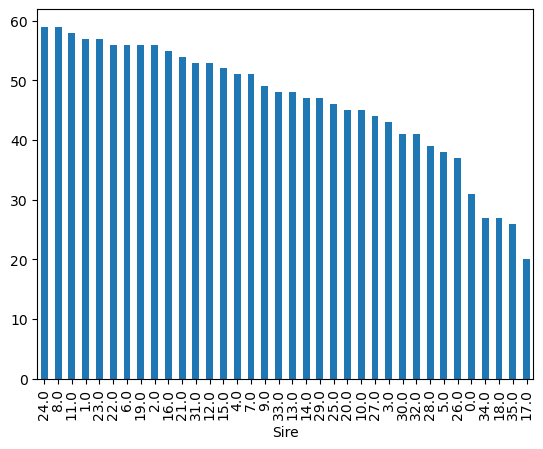

In [19]:
til_ped['Sire'].value_counts().plot(kind='bar')

Same as the previous but this time depicting the size of each family.

<Axes: xlabel='Family'>

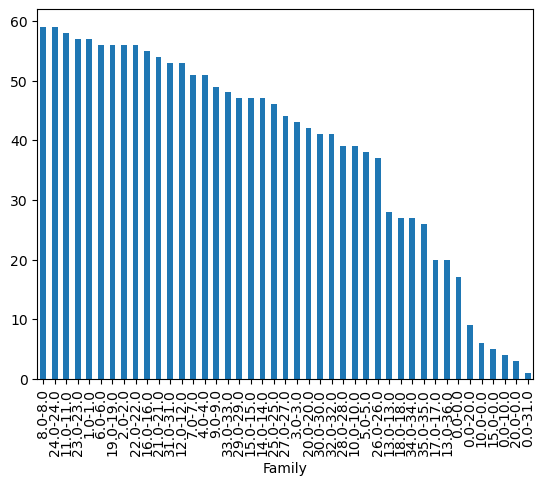

In [20]:
til_ped['Family'] = til_ped['Sire'].astype(str) + "-" + til_ped['Dam'].astype(str)
til_ped['Family'].value_counts().plot(kind='bar')

Create a new column that for offspring originating from the first 20 sires  has the value `early` and for the rest `late`. Check how many records are on each category?

In [21]:
group_names = ['early', 'late']

In [22]:
til_ped['Status'] = pd.cut(til_ped['Sire'],bins=[0,20,35],labels=group_names) 
til_ped

,Id,Sire,Dam,Line,Family,Status
0,10977965,1.0,1.0,Wami,1.0-1.0,early
1,10978207,1.0,1.0,Wami,1.0-1.0,early
2,10978378,1.0,1.0,Wami,1.0-1.0,early
3,10978407,1.0,1.0,Wami,1.0-1.0,early
4,10977732,1.0,1.0,Wami,1.0-1.0,early
...,...,...,...,...,...,...
1743,10977635,35.0,35.0,Ruaha,35.0-35.0,late
1744,10978151,35.0,35.0,Ruaha,35.0-35.0,late
1745,10977918,35.0,35.0,Ruaha,35.0-35.0,late
1746,10977945,35.0,35.0,Ruaha,35.0-35.0,late


In [23]:
til_ped['Status'].value_counts()

Status
early    966
late     675
Name: count, dtype: int64

### Exercise 2

For this exercise we will work with the `pheno.txt` file.


* Change the type of the first column to string. Missing data are coded as `0`. Check how many missing data exist for each column.
* Check for duplications in the first column. If any remove them.
* For the numeric columns fill the missing values with the column mean.
* Create a new column where the animals that have a `weight_final` above 200 have the value `fast_grower`, the animals with a value between 100 - 200 as `medium_grower` and the rest `slow grower`. Check how frequent is each of the above three categories and based on that create a barplot.
* Create a new column where the top 1/3 of the animals in terms of weight difference (weight_final - weight_initial) are marked as `A`, the next 1/3 as `B` and the rest as `C`.


Change the type of the first column to string.

In [24]:
til_pheno = pd.read_csv("pheno.txt", sep="\t", na_values=[0])
til_pheno

,Animal_Id,Location,Line,Weight_initial,Weight_final,Length_initial,Length_final
0,10977965,Kunduchi,Wami,84.30,201.50,14.2,18.0
1,10978207,Kunduchi,Wami,67.80,NaN,13.4,NaN
2,10978378,Kunduchi,Wami,103.94,225.90,14.4,18.5
3,10978460,Kunduchi,Wami,84.85,239.20,14.5,19.9
4,10977732,Kunduchi,Wami,78.29,195.60,14.0,19.0
...,...,...,...,...,...,...,...
1747,10978369,Pangani,Ruaha,26.93,86.12,9.4,13.8
1748,10978013,Pangani,Ruaha,18.02,NaN,8.6,NaN
1749,10978579,Pangani,Ruaha,46.97,101.54,11.0,14.0
1750,10977708,Pangani,Ruaha,39.83,64.24,10.7,13.4


In [25]:
til_pheno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Animal_Id       1752 non-null   int64  
 1   Location        1752 non-null   object 
 2   Line            1752 non-null   object 
 3   Weight_initial  1752 non-null   float64
 4   Weight_final    1393 non-null   float64
 5   Length_initial  1752 non-null   float64
 6   Length_final    1393 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 95.9+ KB


In [26]:
til_pheno[['Animal_Id']] = til_pheno[['Animal_Id']].astype(str)
til_pheno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Animal_Id       1752 non-null   object 
 1   Location        1752 non-null   object 
 2   Line            1752 non-null   object 
 3   Weight_initial  1752 non-null   float64
 4   Weight_final    1393 non-null   float64
 5   Length_initial  1752 non-null   float64
 6   Length_final    1393 non-null   float64
dtypes: float64(4), object(3)
memory usage: 95.9+ KB


Check for duplications in the first column. If any remove them.

In [27]:
til_pheno['Animal_Id'].duplicated().any()

True

In [28]:
sum(til_pheno['Animal_Id'].duplicated())

21

In [29]:
til_pheno.drop_duplicates(subset='Animal_Id',inplace=True)

In [30]:
til_pheno['Animal_Id'].duplicated().any()

False

For the numeric columns fill the missing values with the column mean.

In [31]:
num_columns = ['Weight_initial','Weight_final','Length_initial','Length_final']

In [32]:
for column in num_columns:
    column_mean = np.nanmean(til_pheno[column])
    print(column_mean)
    til_pheno[column].fillna(value=column_mean,inplace=True)

46.046915077989595
113.79408563134979
11.048238012709417
14.586937590711175


In [33]:
til_pheno.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1731 entries, 0 to 1751
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Animal_Id       1731 non-null   object 
 1   Location        1731 non-null   object 
 2   Line            1731 non-null   object 
 3   Weight_initial  1731 non-null   float64
 4   Weight_final    1731 non-null   float64
 5   Length_initial  1731 non-null   float64
 6   Length_final    1731 non-null   float64
dtypes: float64(4), object(3)
memory usage: 108.2+ KB


In [34]:
til_pheno

,Animal_Id,Location,Line,Weight_initial,Weight_final,Length_initial,Length_final
0,10977965,Kunduchi,Wami,84.30,201.500000,14.2,18.000000
1,10978207,Kunduchi,Wami,67.80,113.794086,13.4,14.586938
2,10978378,Kunduchi,Wami,103.94,225.900000,14.4,18.500000
3,10978460,Kunduchi,Wami,84.85,239.200000,14.5,19.900000
4,10977732,Kunduchi,Wami,78.29,195.600000,14.0,19.000000
...,...,...,...,...,...,...,...
1747,10978369,Pangani,Ruaha,26.93,86.120000,9.4,13.800000
1748,10978013,Pangani,Ruaha,18.02,113.794086,8.6,14.586938
1749,10978579,Pangani,Ruaha,46.97,101.540000,11.0,14.000000
1750,10977708,Pangani,Ruaha,39.83,64.240000,10.7,13.400000


Create a new column where the animals that have a weight_final above 200 have the value fast_grower, the animals with a value between 100 - 200 as medium_grower and the rest slow grower. Check how frequent is each of the above three categories and based on that create a barplot.

In [35]:
labels = ['fast_grower','medium_grower','slow_grower']
til_pheno['Growth_status'] = pd.cut(til_pheno['Weight_final'],bins=[0,100,200,max(til_pheno['Weight_final'])],labels=labels)
til_pheno

,Animal_Id,Location,Line,Weight_initial,Weight_final,Length_initial,Length_final,Growth_status
0,10977965,Kunduchi,Wami,84.30,201.500000,14.2,18.000000,slow_grower
1,10978207,Kunduchi,Wami,67.80,113.794086,13.4,14.586938,medium_grower
2,10978378,Kunduchi,Wami,103.94,225.900000,14.4,18.500000,slow_grower
3,10978460,Kunduchi,Wami,84.85,239.200000,14.5,19.900000,slow_grower
4,10977732,Kunduchi,Wami,78.29,195.600000,14.0,19.000000,medium_grower
...,...,...,...,...,...,...,...,...
1747,10978369,Pangani,Ruaha,26.93,86.120000,9.4,13.800000,fast_grower
1748,10978013,Pangani,Ruaha,18.02,113.794086,8.6,14.586938,medium_grower
1749,10978579,Pangani,Ruaha,46.97,101.540000,11.0,14.000000,medium_grower
1750,10977708,Pangani,Ruaha,39.83,64.240000,10.7,13.400000,fast_grower


In [36]:
til_pheno['Growth_status'].value_counts()

Growth_status
medium_grower    979
fast_grower      654
slow_grower       98
Name: count, dtype: int64

<Axes: xlabel='Growth_status'>

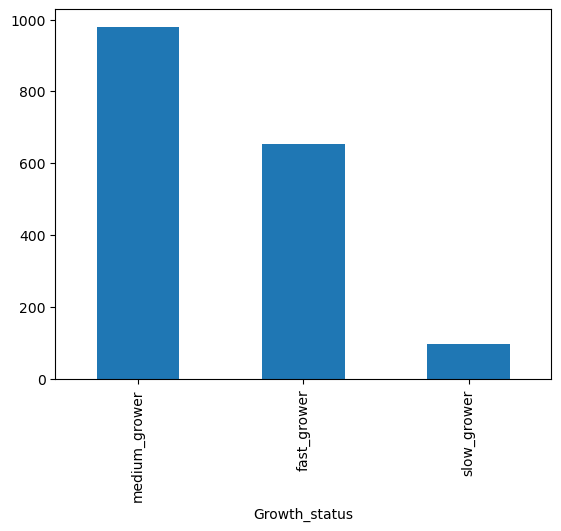

In [37]:
til_pheno['Growth_status'].value_counts().plot(kind='bar')

Create a new column where the top 1/3 of the animals in terms of weight difference (weight_final - weight_initial) are marked as A, the next 1/3 as B and the rest as C.

In [38]:
til_pheno['Weight_diff'] = til_pheno['Weight_final'] - til_pheno['Weight_initial']
til_pheno['class'] = pd.qcut(til_pheno['Weight_diff'],3,labels=labels)
til_pheno

,Animal_Id,Location,Line,Weight_initial,Weight_final,Length_initial,Length_final,Growth_status,Weight_diff,class
0,10977965,Kunduchi,Wami,84.30,201.500000,14.2,18.000000,slow_grower,117.200000,slow_grower
1,10978207,Kunduchi,Wami,67.80,113.794086,13.4,14.586938,medium_grower,45.994086,fast_grower
2,10978378,Kunduchi,Wami,103.94,225.900000,14.4,18.500000,slow_grower,121.960000,slow_grower
3,10978460,Kunduchi,Wami,84.85,239.200000,14.5,19.900000,slow_grower,154.350000,slow_grower
4,10977732,Kunduchi,Wami,78.29,195.600000,14.0,19.000000,medium_grower,117.310000,slow_grower
...,...,...,...,...,...,...,...,...,...,...
1747,10978369,Pangani,Ruaha,26.93,86.120000,9.4,13.800000,fast_grower,59.190000,medium_grower
1748,10978013,Pangani,Ruaha,18.02,113.794086,8.6,14.586938,medium_grower,95.774086,slow_grower
1749,10978579,Pangani,Ruaha,46.97,101.540000,11.0,14.000000,medium_grower,54.570000,medium_grower
1750,10977708,Pangani,Ruaha,39.83,64.240000,10.7,13.400000,fast_grower,24.410000,fast_grower


In [39]:
til_pheno['class'].value_counts()

class
fast_grower      577
medium_grower    577
slow_grower      577
Name: count, dtype: int64